In [140]:
import numpy as np
import cupy as cp
import time

# Функция для сложения элементов вектора на CPU
def vecsum_cpu(vec):
    cpu_sum = 0
    for i in vec: 
        cpu_sum += i
    return cpu_sum

# Функция для сложения элементов вектора на CGPU
def vecsum_on_gpu(vec):
  # Копия вектора на GPU
  vec_gpu = cp.asarray(vec)
  sum_gpu = cp.sum(vec_gpu)
  sum_cpu = cp.asnumpy(sum_gpu) # Возвращаем результат на CPU
  return sum_cpu

Результаты в зависимости от размера матрицы:
    Размер  Время на CPU  Время на GPU  Ускорение
0     1000      0.000100      0.000199   0.500299
1     5000      0.000499      0.000299   1.666507
2    10000      0.001097      0.000399   2.750583
3    50000      0.004886      0.000799   6.117127
4   100000      0.010295      0.000876  11.757399
5   500000      0.056353      0.002790  20.196107
6  1000000      0.094849      0.004482  21.161397


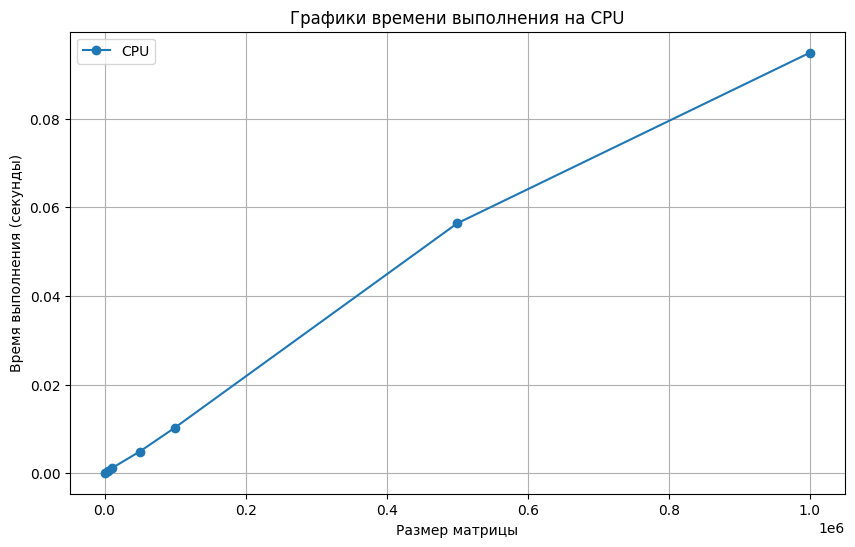

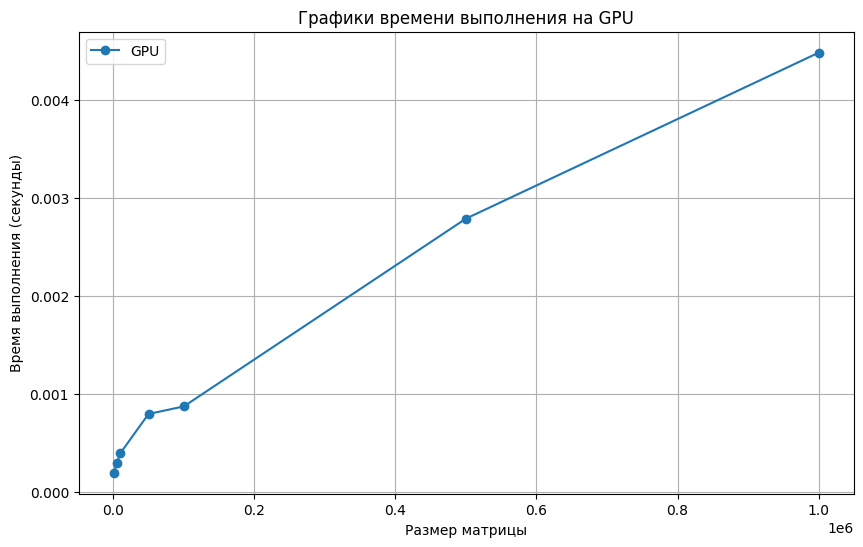

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


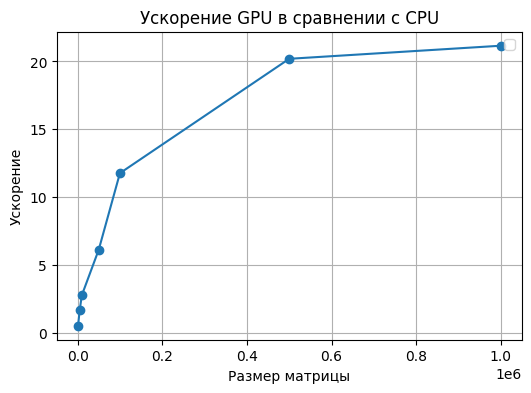

In [141]:
mat_sizes = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]  # Размеры матриц
results = []

for size in mat_sizes:
    vec = np.random.rand(size)
    res_time_cpu = 0
    res_time_gpu = 0
    
    for i in range(10):
        #Вычисления на CPU
        start_time = time.time()
        cpu_res = vecsum_cpu(vec)
        cpu_time = time.time() - start_time
        res_time_cpu += cpu_time
        
        # GPU вычисления
        start_time = time.time()
        gpu_res = vecsum_on_gpu(vec)
        gpu_time = time.time() - start_time
        res_time_gpu += gpu_time

    # Расчет ускорения
    speedup = res_time_cpu / res_time_gpu if res_time_gpu != 0 else float('inf')

    correct = validate_results(cpu_res, gpu_res)

    if size != 0:
        results.append({
            'Размер': size,
            'Время на CPU': res_time_cpu / 10,
            'Время на GPU': res_time_gpu / 10,
            'Ускорение': speedup
        })

res_tab = pd.DataFrame(results)
print("Результаты в зависимости от размера матрицы:")
print(res_tab)

# Построение графика времени выполнения
plt.figure(figsize=(10, 6))
plt.plot(res_tab['Размер'], res_tab['Время на CPU'], label="CPU", marker='o')
plt.title("Графики времени выполнения на CPU")
plt.xlabel("Размер матрицы")
plt.ylabel("Время выполнения (секунды)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(res_tab['Размер'], res_tab['Время на GPU'], label="GPU", marker='o')
plt.title("Графики времени выполнения на GPU")
plt.xlabel("Размер матрицы")
plt.ylabel("Время выполнения (секунды)")
plt.legend()
plt.grid(True)
plt.show()

# Построение графика ускорения
plt.figure(figsize=(6, 4))
plt.plot(res_tab['Размер'], res_tab['Ускорение'], marker='o')
plt.title("Ускорение GPU в сравнении с CPU")
plt.xlabel("Размер матрицы")
plt.ylabel("Ускорение")
plt.legend()
plt.grid(True)
plt.show()